In [1]:
# Titatnic gemisinde hayatta kalanlari tahmin eden model
import pandas as pd
# evet hayir sorusunun cevabi : classification
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv("ttrain.csv")

In [3]:
df2 = pd.read_csv("ttest.csv")

## EDA - Exploratory Data Analysis

In [4]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
df1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df2.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
# DRY - Dont repeat yourself. Bir isi iki kez yapmak istemyoruz

In [9]:
df1.shape, df2.shape

((891, 12), (418, 11))

In [10]:
df=df1.append(df2)

C:\Users\haluk\AppData\Local\Temp\ipykernel_15696\2456558213.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df1.append(df2)


In [11]:
#pd.concat(df1,df2)

In [12]:
df.shape, df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


((1309, 12), None)

In [13]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [14]:
df["Fare"].mean(), df["Fare"].min(), df["Fare"].max(), df["Fare"].std()

(33.29547928134557, 0.0, 512.3292, 51.75866823917414)

In [15]:
# fillna bos verileri doldurur

In [16]:
df["Fare"] = df["Fare"].fillna( df["Fare"].mean())

<Axes: xlabel='Embarked', ylabel='count'>

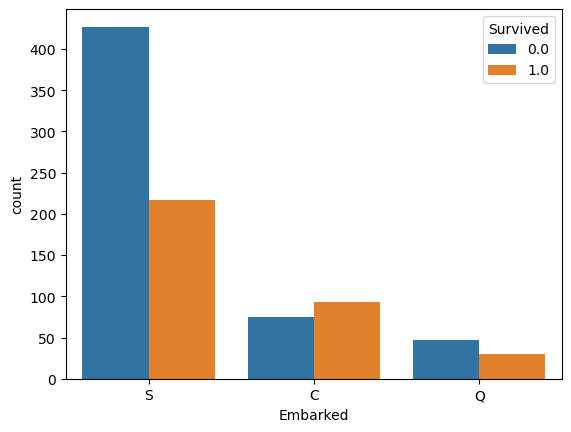

In [17]:
sns.countplot(x=df["Embarked"], hue=df['Survived'])

In [18]:
df["Embarked"].value_counts(normalize = True) # limandan binenlerin yuzdesi

S    0.699311
C    0.206580
Q    0.094109
Name: Embarked, dtype: float64

In [19]:
df["Embarked"].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [20]:
# boslugu en cok tekrar eden deger ile dolduruyoruz
#df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode())
# mode 2 boyutlu veri veriyor
df["Embarked"] = df["Embarked"].fillna('S')

In [21]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
dtype: int64

In [22]:
df.shape

(1309, 12)

In [23]:
del df["Cabin"]
# veya
# df.drop("Cabin", axis = 1, inplace=True)
# Axis = 0 satir, Axis = 1 sutun silmek icin seciliyor

In [24]:
# regressions Age `i tahmin etmek icin en iyi yontem

### Feature Engineering : oznitelik veride olmayip sonradan uretilen sutunlar.


In [25]:
df["Title"]=df["Name"].str.extract(" ([A-Za-z]+)\.",expand=False)

In [26]:
df["Title"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [27]:
df["Title"].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: Title, dtype: int64

In [28]:
#yanlis yazilmis olanlari duzeltme

In [29]:
df["Title"] = df["Title"].replace(['Ms', 'Mlle' ], 'Miss')
df["Title"] = df["Title"].replace(['Mme', 'Countess', 'Lady', 'Dona' ], 'Mrs')
df["Title"] = df["Title"].replace(['Rev', 'Jonkheer', 'Sir', 'Don','Major', 'Dr', 'Capt', 'Col' ], 'Mr')

In [30]:
df["Sex"].value_counts()

male      843
female    466
Name: Sex, dtype: int64

In [31]:
df.groupby('Sex')['Age'].mean()
df.groupby('Sex')['Age'].median()

Sex
female    27.0
male      28.0
Name: Age, dtype: float64

In [32]:
df["Age"]=df["Age"].fillna(df.groupby('Title')["Age"].transform('median')   )

In [33]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
Title            0
dtype: int64

In [34]:
df.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
620,621,0.0,3,"Yasbeck, Mr. Antoni",male,27.0,1,0,2659,14.4542,C,Mr


In [35]:
df.drop(['PassengerId','Ticket', 'Name'], axis = 1, inplace = True )

In [36]:
df['Family'] = df['SibSp'] + df['Parch']+1

In [37]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family
0,0.0,3,male,22.0,1,0,7.2500,S,Mr,2
1,1.0,1,female,38.0,1,0,71.2833,C,Mrs,2
2,1.0,3,female,26.0,0,0,7.9250,S,Miss,1
3,1.0,1,female,35.0,1,0,53.1000,S,Mrs,2
4,0.0,3,male,35.0,0,0,8.0500,S,Mr,1


In [38]:
data=pd.get_dummies(df,drop_first = True)

In [39]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Family,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs
0,0.0,3,22.0,1,0,7.2500,2,1,0,1,0,1,0
1,1.0,1,38.0,1,0,71.2833,2,0,0,0,0,0,1
2,1.0,3,26.0,0,0,7.9250,1,0,0,1,1,0,0
3,1.0,1,35.0,1,0,53.1000,2,0,0,1,0,0,1
4,0.0,3,35.0,0,0,8.0500,1,1,0,1,0,1,0


In [54]:
train = data[:891]
test = data[891:]

In [55]:
data.to_csv('titanichazirveri.csv')

In [56]:
x_train = train.drop( 'Survived', axis = 1 )
y_train = train[ 'Survived' ]

In [62]:
y_train

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
886    0.0
887    1.0
888    0.0
889    1.0
890    0.0
Name: Survived, Length: 891, dtype: float64

In [58]:
x_test = test.drop( 'Survived', axis = 1 )

In [59]:
x_test

,Pclass,Age,SibSp,Parch,Fare,Family,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs
0,3,34.5,0,0,7.8292,1,1,1,0,0,1,0
1,3,47.0,1,0,7.0000,2,0,0,1,0,0,1
2,2,62.0,0,0,9.6875,1,1,1,0,0,1,0
3,3,27.0,0,0,8.6625,1,1,0,1,0,1,0
4,3,22.0,1,1,12.2875,3,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,30.0,0,0,8.0500,1,1,0,1,0,1,0
414,1,39.0,0,0,108.9000,1,0,0,0,0,0,1
415,3,38.5,0,0,7.2500,1,1,0,1,0,1,0
416,3,30.0,0,0,8.0500,1,1,0,1,0,1,0


In [44]:
from sklearn.tree import DecisionTreeClassifier

In [45]:
d  = DecisionTreeClassifier()

In [63]:
model = d.fit(x_train,y_train)

In [64]:
tahmin = model.predict(x_test)

In [65]:
sonuc = pd.DataFrame()

In [66]:
sonuc["PassengerId" ] = df2['PassengerId']
sonuc['Survived'] = tahmin

In [67]:
sonuc

,PassengerId,Survived
0,892,0.0
1,893,1.0
2,894,1.0
3,895,1.0
4,896,1.0
...,...,...
413,1305,0.0
414,1306,1.0
415,1307,0.0
416,1308,0.0


In [68]:
# kagle sonuclari int23 cinsinden istiyor
sonuc['Survived'] = sonuc['Survived'].astype('int32')

In [69]:
# Kagle sonuc dosyasinda index istemiyor
sonuc.to_csv('titanictahmin.csv', index = False)

,PassengerId,Survived
0,892,0
1,893,1
2,894,1
3,895,1
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


##  SOLUTION BY ANN, DL, TENSORFLOW, KERAS

In [83]:
# this block of the code I take from Tugba Kayhan, and edited it further
for column in df.columns: 
    if df[column].dtype == 'object' :
        #print(type(df[column]))
        value_counts = df[column].value_counts()
        num_categories = len(value_counts)
        
        # İki alt kategorisi varsa 0 ve 1 olarak kodlayalım
        if num_categories == 2:
            category_mapping = {category: index for index, category in enumerate(value_counts.index)}
            df[column] = df[column].map(category_mapping)
        # İki alt kategoriden fazlaysa 1'den başlayan sıralı sayılarla kodlayalım
        else:
            category_mapping = {category: index + 1 for index, category in enumerate(value_counts.index)}
            df[column] = df[column].map(category_mapping)

In [84]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family
0,0.0,3,0,22.0,1,0,7.2500,1,1,2
1,1.0,1,1,38.0,1,0,71.2833,2,3,2
2,1.0,3,1,26.0,0,0,7.9250,1,2,1
3,1.0,1,1,35.0,1,0,53.1000,1,3,2
4,0.0,3,0,35.0,0,0,8.0500,1,1,1
...,...,...,...,...,...,...,...,...,...,...
413,NaN,3,0,30.0,0,0,8.0500,1,1,1
414,NaN,1,1,39.0,0,0,108.9000,2,3,1
415,NaN,3,0,38.5,0,0,7.2500,1,1,1
416,NaN,3,0,30.0,0,0,8.0500,1,1,1


In [86]:
train = df[:891]
test = df[891:]
x_test = test.drop( 'Survived', axis = 1 )

In [87]:
x_train = train.drop( 'Survived', axis = 1 )
y_train = train[ 'Survived' ]

In [88]:
x_train.shape[1]

9

In [134]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

# Create a sequential model
model = Sequential()

# Add input layer
model.add(Dense(units=256, activation='relu', input_dim=x_train.shape[1]))

# Add a hidden layer
model.add(Dense(units=128, activation='relu'))

# Add a hidden layer
model.add(Dense(units=64, activation='relu'))

# Add a hidden layer
model.add(Dense(units=64, activation='relu'))




# Add output layer with 1 neuron (binary classification)
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with early stopping
model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_train, y_train), callbacks=[early_stopping])


Epoch 1/50
28/28 [==============================] - 1s 7ms/step - loss: 0.6762 - accuracy: 0.6577 - val_loss: 0.6311 - val_accuracy: 0.6824
Epoch 2/50
28/28 [==============================] - 0s 3ms/step - loss: 0.6119 - accuracy: 0.6947 - val_loss: 0.5938 - val_accuracy: 0.6364
Epoch 3/50
28/28 [==============================] - 0s 4ms/step - loss: 0.5743 - accuracy: 0.7138 - val_loss: 0.5326 - val_accuracy: 0.7464
Epoch 4/50
28/28 [==============================] - 0s 3ms/step - loss: 0.5975 - accuracy: 0.7273 - val_loss: 0.5976 - val_accuracy: 0.7217
Epoch 5/50
28/28 [==============================] - 0s 3ms/step - loss: 0.5354 - accuracy: 0.7654 - val_loss: 0.5524 - val_accuracy: 0.7879
Epoch 6/50
28/28 [==============================] - 0s 2ms/step - loss: 0.5199 - accuracy: 0.7767 - val_loss: 0.4798 - val_accuracy: 0.8137
Epoch 7/50
28/28 [==============================] - 0s 3ms/step - loss: 0.4499 - accuracy: 0.8182 - val_loss: 0.4371 - val_accuracy: 0.8249
Epoch 8/50
28/28 [==

In [135]:
model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_132 (Dense)           (None, 256)               2560      
                                                                 
 dense_133 (Dense)           (None, 128)               32896     
                                                                 
 dense_134 (Dense)           (None, 64)                8256      
                                                                 
 dense_135 (Dense)           (None, 64)                4160      
                                                                 
 dense_136 (Dense)           (None, 1)                 65        
                                                                 
Total params: 47937 (187.25 KB)
Trainable params: 47937 (187.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [136]:
model.evaluate(x_train,y_train)

28/28 [==============================] - 0s 966us/step - loss: 0.4317 - accuracy: 0.8193


[0.4317080080509186, 0.8193041682243347]

In [137]:
prediction = model.predict(x_test)

14/14 [==============================] - 0s 853us/step


In [138]:
threshold = 0.5  # You can adjust this threshold as needed
binary_prediction = (prediction > threshold).astype(int)

In [139]:
binary_prediction

array([[0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
    

In [140]:
!pip install pycaret

Defaulting to user installation because normal site-packages is not writeable


In [151]:
from pycaret.classification import*
from pycaret.classification import compare_models

In [152]:
setup(df[:891],target = 'Survived')

,Description,Value
0,Session id,3236
1,Target,Survived
2,Target type,Binary
3,Original data shape,"(891, 10)"
4,Transformed data shape,"(891, 10)"
5,Transformed train set shape,"(623, 10)"
6,Transformed test set shape,"(268, 10)"
7,Numeric features,9
8,Preprocess,True
9,Imputation type,simple


In [153]:
best_model = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

[]